AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

# 1. Import the Titanic dataset using pandas
df = pd.read_csv('E:/pythonLearn/ex_5/titanic.csv')

# 2. Create a DataFrame from the dataset (already done in the step above)

# 3. Print the first 10 rows of the dataset
first_10_rows = df.head(10)

# 4. Print the last 20 rows of the dataset
last_20_rows = df.tail(20)

# 5. Print dataset's information
info = pd.DataFrame({'Dataset Info': [df.info(verbose=True, memory_usage=True)]})

# 6. Describe the dataset
description = df.describe()

# 7. Combine all information into a single table (we will display the first 10, last 20 rows, and description)

# Use concat to combine the first 10 and last 20 rows with the description
combined = pd.concat([first_10_rows, last_20_rows])

# Print results
print("First 10 rows and Last 20 rows combined:")
print(combined)

print("\nDataset Information:")
print(info)

print("\nDescription of the dataset:")
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
First 10 rows and Last 20 rows combined:
     PassengerId Survived  Pclass  \
0              1        0       3   
1              2        1       1   
2              3        1       3   
3              4        1       1   
4              5  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


NaN values in 'Fare' after conversion: 7


C:\Users\86139\AppData\Local\Temp\ipykernel_19928\1210740252.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


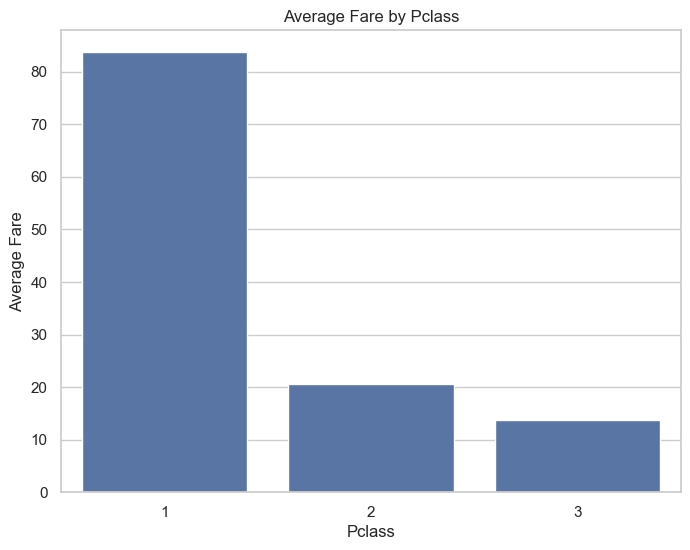

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('E:/pythonLearn/ex_5/titanic.csv')

# Convert 'Fare' to numeric and handle errors
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Check for NaN values in 'Fare' after conversion
print("NaN values in 'Fare' after conversion:", df['Fare'].isnull().sum())

# Fill NaN values in 'Fare' with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Now calculate the average fare grouped by Pclass
avg_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_pclass.index, y=avg_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

C:\Users\86139\AppData\Local\Temp\ipykernel_19928\3740491204.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # Fill NaN with mean value


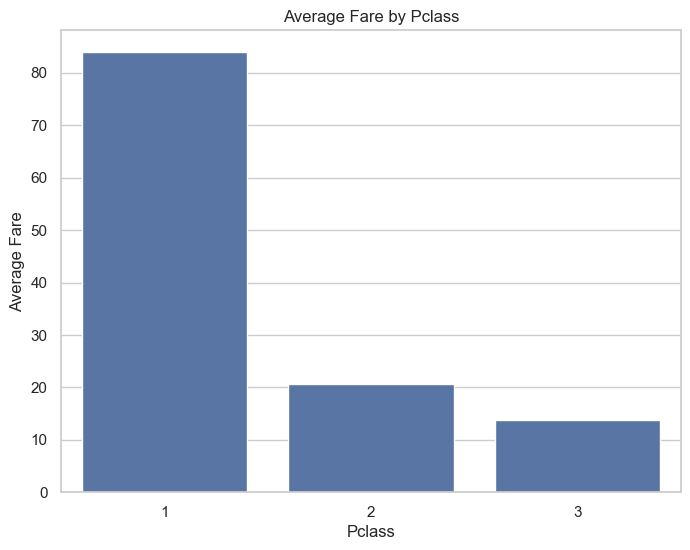

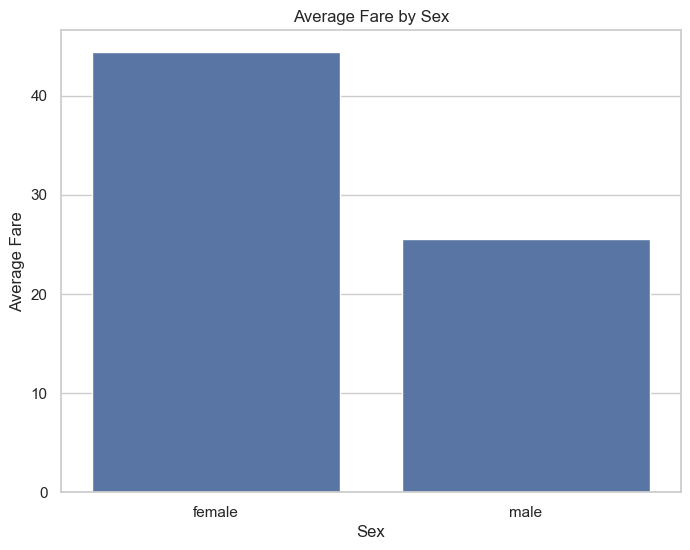

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('E:/pythonLearn/ex_5/titanic.csv')

# Check and clean 'Fare' column
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  # Convert to numeric, coercing errors to NaN
df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # Fill NaN with mean value

# 1. Calculate the average fare grouped by Pclass
avg_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()

# 1.1 Plot the result using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_pclass.index, y=avg_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# 2. Calculate the average fare grouped by Sex
avg_fare_by_sex = df.groupby('Sex')['Fare'].mean()

# 2.1 Plot the result using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_sex.index, y=avg_fare_by_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
dtype: object


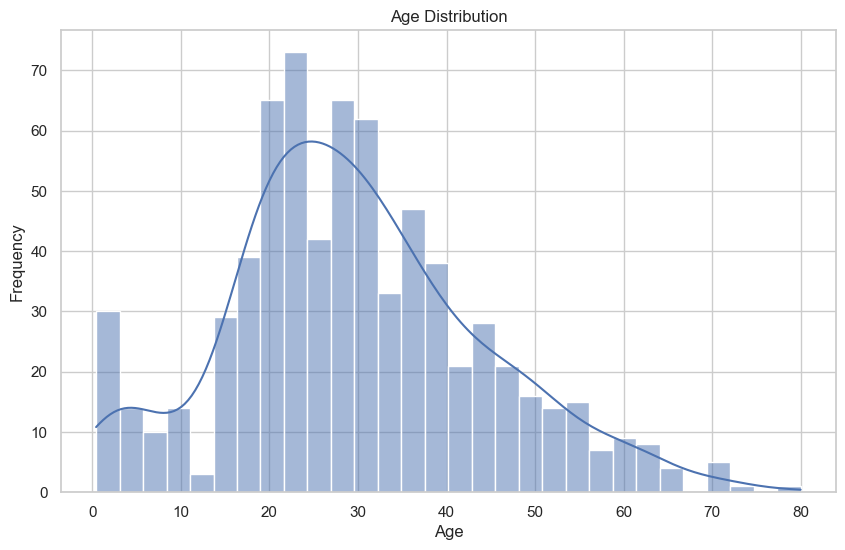

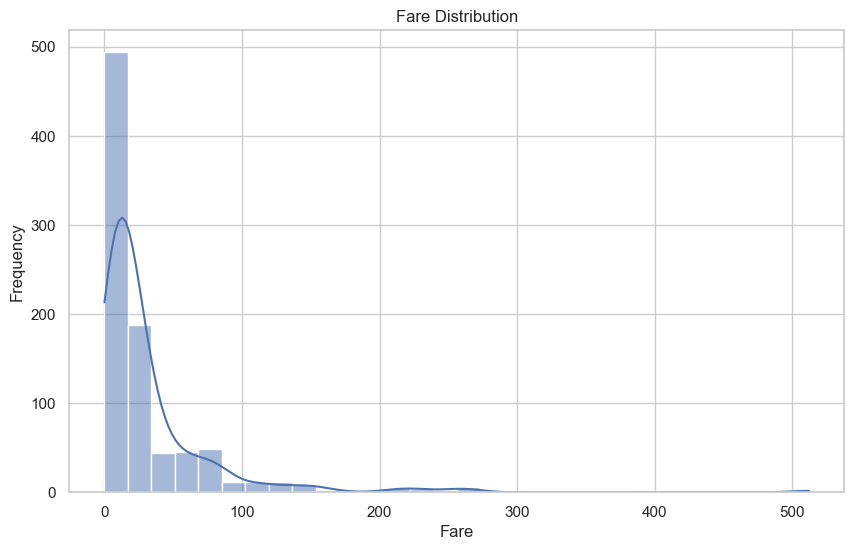

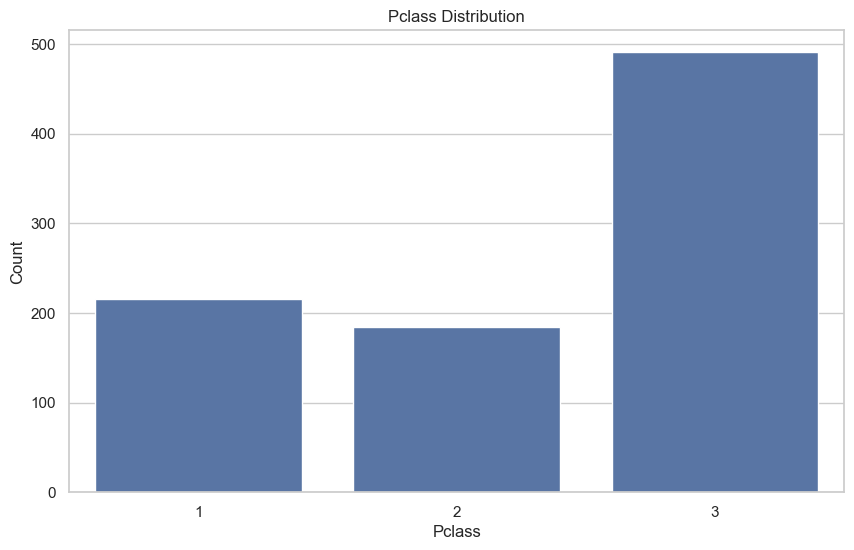

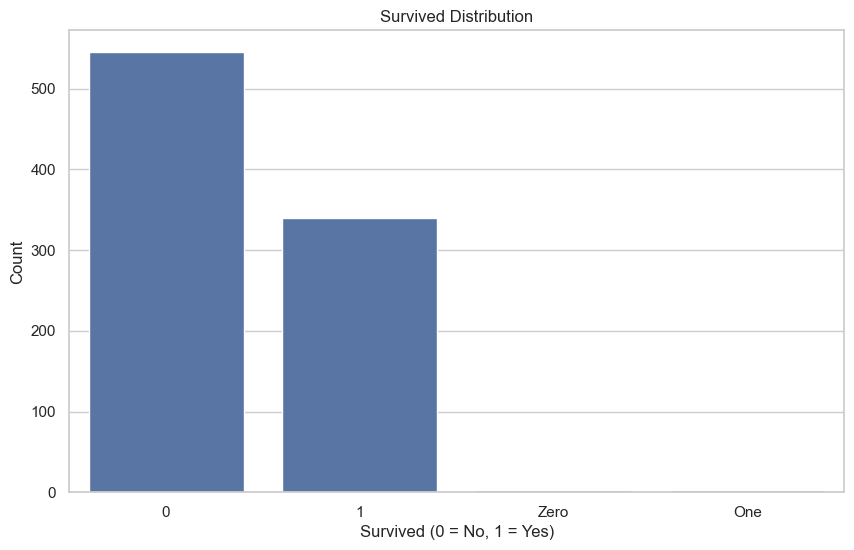

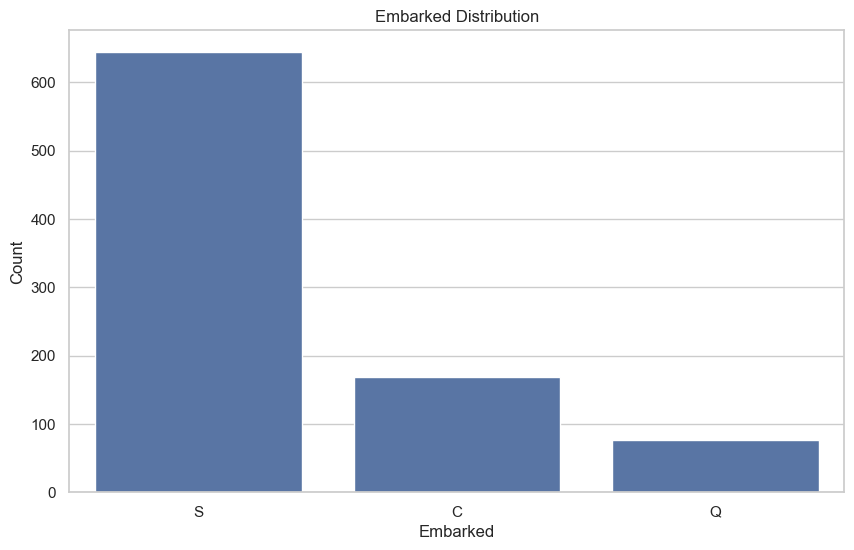

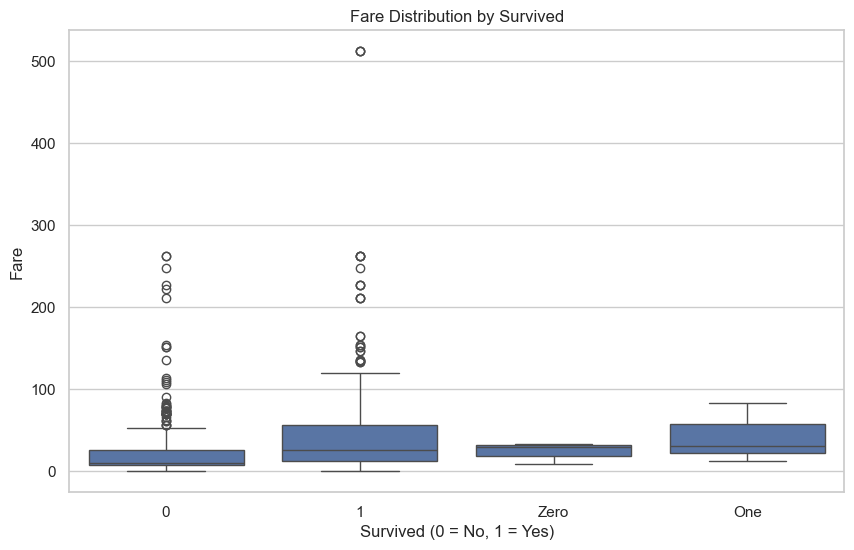

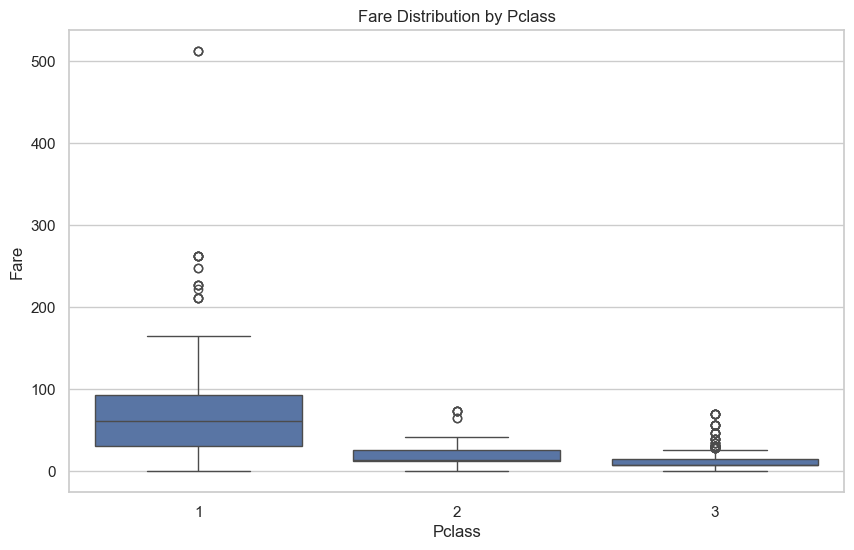

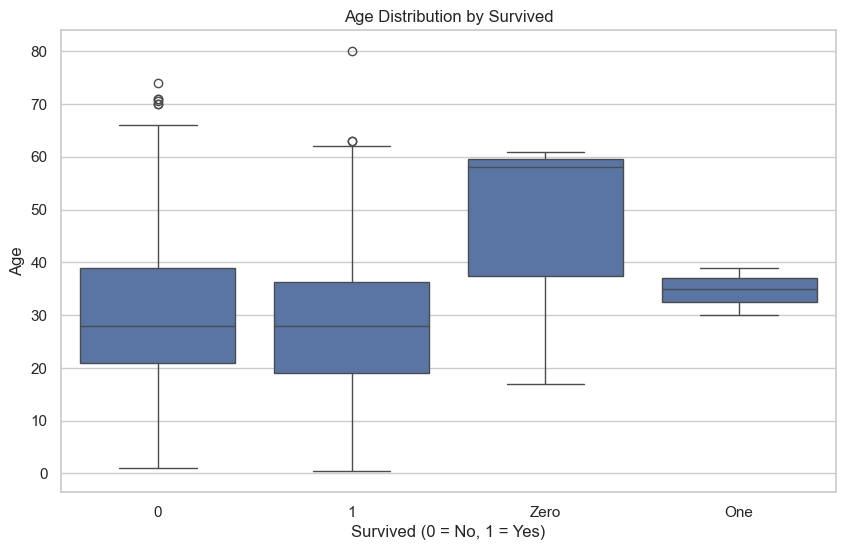

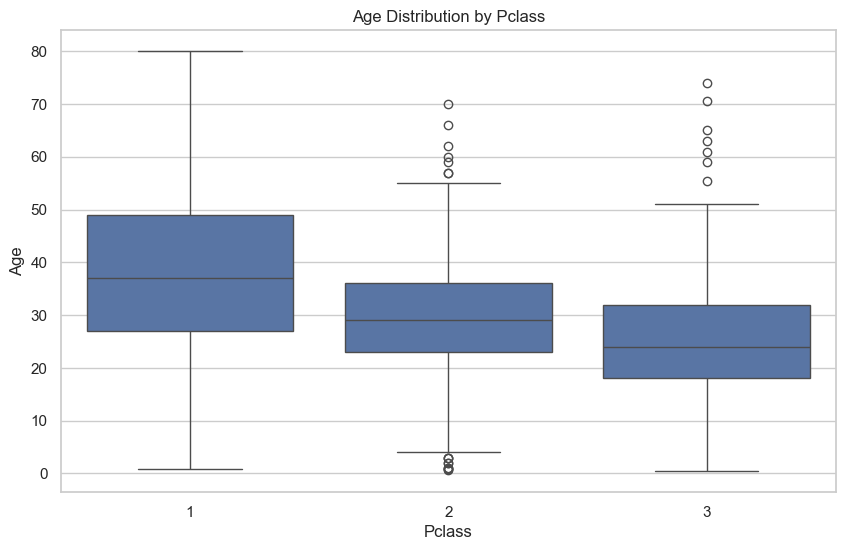

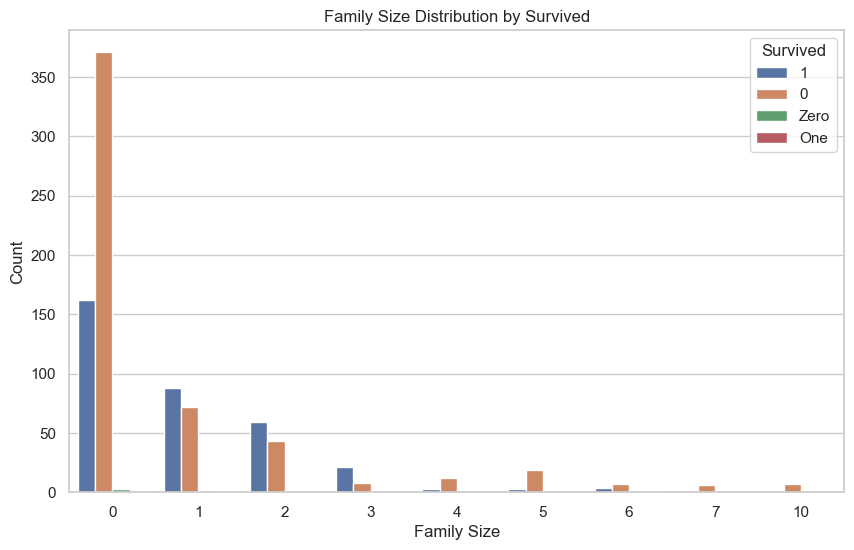

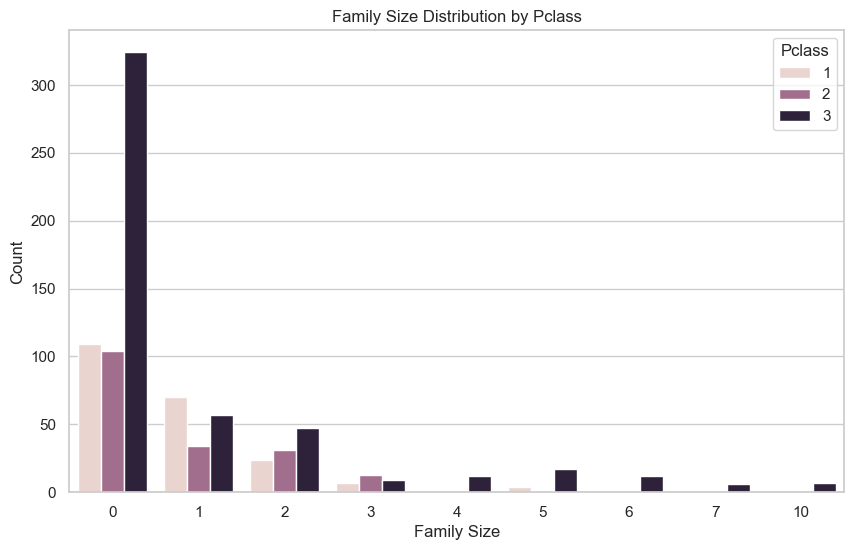

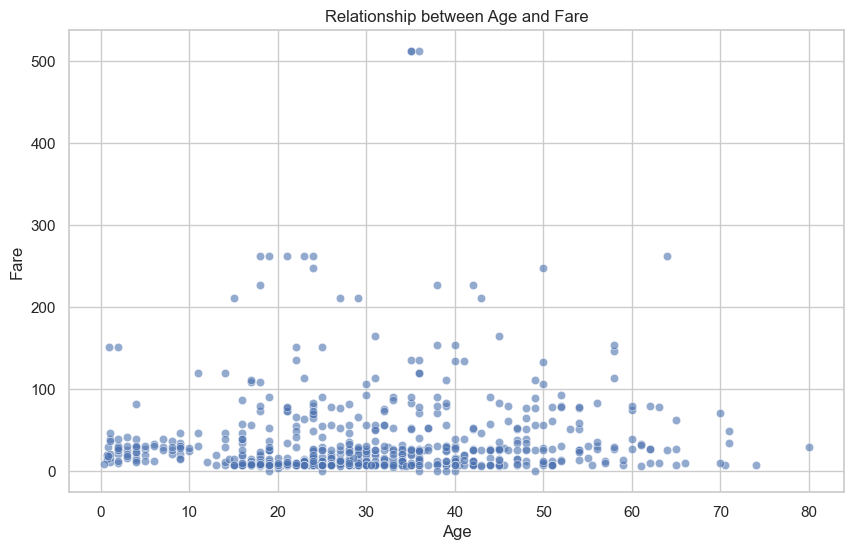

<Figure size 1000x600 with 0 Axes>

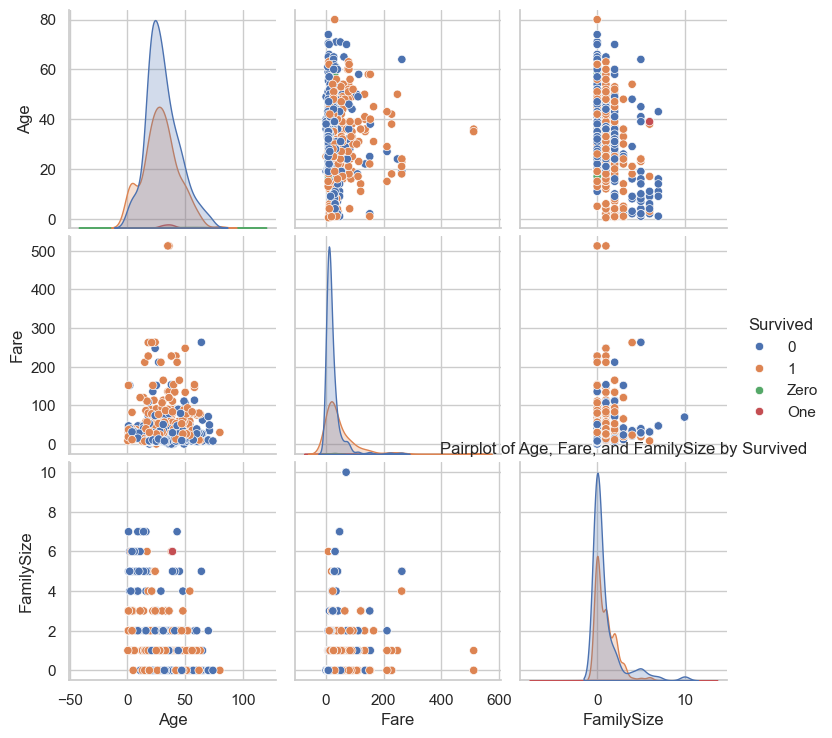

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('E:/pythonLearn/ex_5/titanic.csv')

# Ensure 'SibSp' and 'Parch' are numeric, then create 'FamilySize' as integer
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce')
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce')
df['FamilySize'] = (df['SibSp'] + df['Parch']).astype(int)

# Ensure 'Age' and 'Fare' are numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Check data types
print(df.dtypes)

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 11. Plot the distribution of 'FamilySize' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Additional possibilities to show relationships (e.g., using pairplot)
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'FamilySize'], diag_kind='kde')
plt.title('Pairplot of Age, Fare, and FamilySize by Survived')
plt.show()




AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

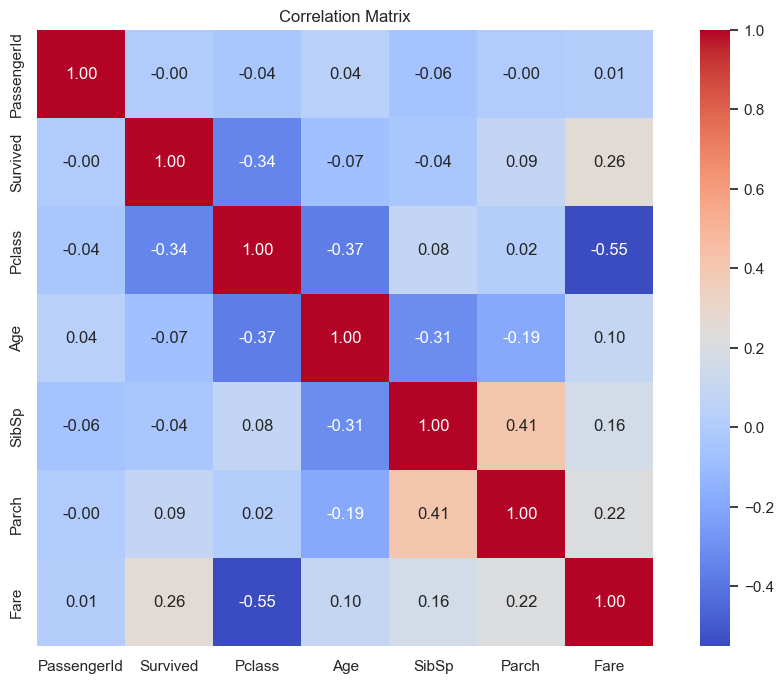

Correlation between Age and Fare: 0.10

Correlations with 'Survived':
Fare           0.255432
Parch          0.088788
PassengerId   -0.002010
SibSp         -0.036284
Age           -0.074185
Pclass        -0.339821
Name: Survived, dtype: float64

Additional correlations among Age, Fare, Pclass, SibSp, and Parch:
             Age      Fare    Pclass     SibSp     Parch
Age     1.000000  0.096511 -0.369226 -0.308247 -0.189119
Fare    0.096511  1.000000 -0.550122  0.159746  0.216417
Pclass -0.369226 -0.550122  1.000000  0.083081  0.018443
SibSp  -0.308247  0.159746  0.083081  1.000000  0.414838
Parch  -0.189119  0.216417  0.018443  0.414838  1.000000


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('E:/pythonLearn/ex_5/titanic.csv')

# 1. Clean and preprocess the data
# Convert relevant columns to numeric, coerce errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
# If 'FamilySize' is not a numeric column, you can create it
# Example: df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. Check if 'Survived' is a numeric column or convert it
if df['Survived'].dtype not in ['int64', 'float64']:
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# 3. Drop non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 4. Generate a correlation matrix for the entire dataset
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# 5. Find correlation between 'Age' and 'Fare'
if 'Age' in numeric_df and 'Fare' in numeric_df:
    age_fare_correlation = numeric_df['Age'].corr(numeric_df['Fare'])
    print(f"Correlation between Age and Fare: {age_fare_correlation:.2f}")
else:
    print("Age or Fare columns are not available for correlation.")

# 6. Possible correlations in the dataset
if 'Survived' in numeric_df.columns:
    correlation_with_survived = numeric_df.corr()['Survived'].drop('Survived').sort_values(ascending=False)
    print("\nCorrelations with 'Survived':")
    print(correlation_with_survived)
else:
    print("'Survived' column is not present in the dataset.")

# Additional correlation checks
additional_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
for col in additional_columns:
    if col not in numeric_df.columns:
        print(f"Column '{col}' is not present in numeric_df.")
        
additional_correlations = numeric_df.corr().loc[additional_columns, additional_columns]
print("\nAdditional correlations among Age, Fare, Pclass, SibSp, and Parch:")
print(additional_correlations)

